In [95]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [96]:
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [145]:
df.shape

(891, 12)

In [146]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [144]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [97]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

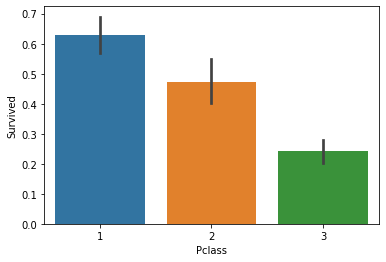

In [98]:
sns.barplot(x='Pclass', y='Survived', data=df)

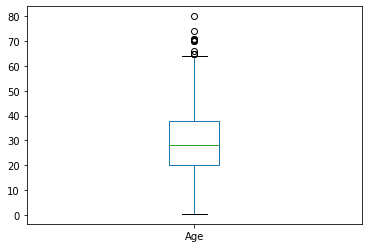

In [99]:
df['Age'].plot.box()

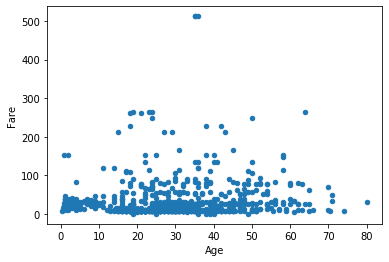

In [100]:
df.plot.scatter('Age','Fare')

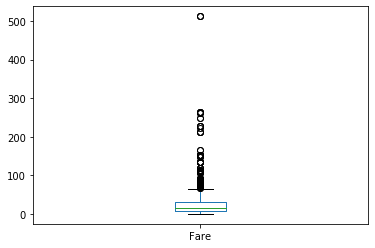

In [101]:
df['Fare'].plot.box()

In [102]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

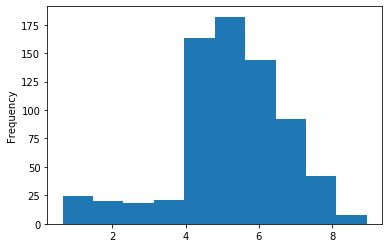

In [103]:
np.sqrt(df['Age']).plot.hist()

In [104]:
df.loc[df['Age']>55,'Age']=np.mean(df['Age'])

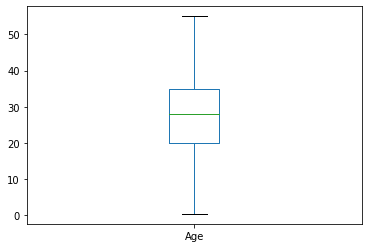

In [105]:
df['Age'].plot.box()

In [106]:
df.loc[df['Fare']>50,'Fare']=np.mean(df['Fare'])

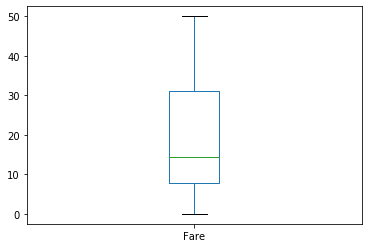

In [107]:
df['Fare'].plot.box()

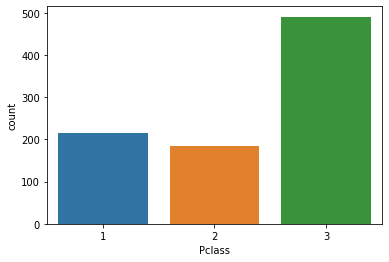

In [108]:
sns.countplot(df['Pclass'])

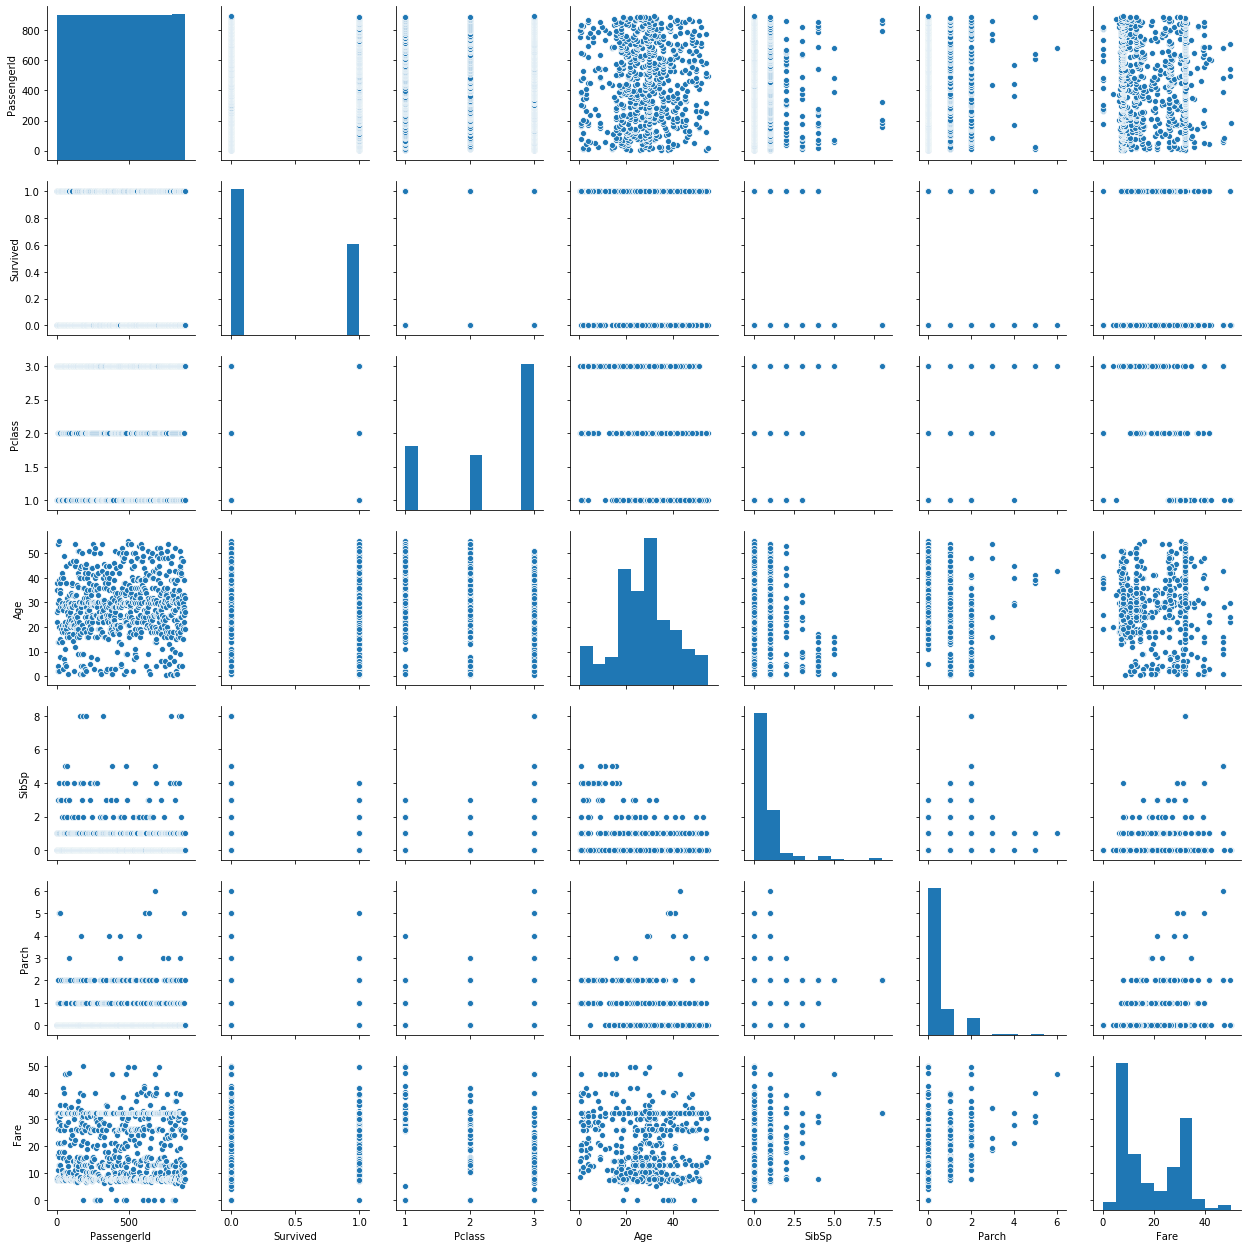

In [109]:
sns.pairplot(df)

In [110]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [111]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

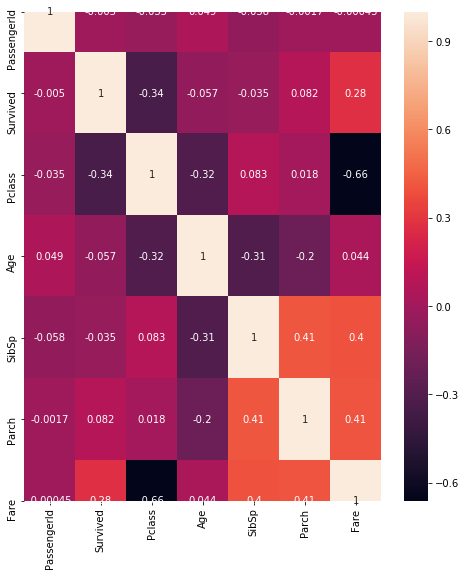

In [112]:
corr_hmap=df.corr()
plt.figure(figsize=(8,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [113]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,27.869937,0.523008,0.381594,18.538844
std,257.353842,0.486592,0.836071,12.088550,1.102743,0.806057,11.213757
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,55.000000,8.000000,6.000000,50.000000


In [114]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()

df['Sex'] = number.fit_transform(df['Sex'].astype(str))


In [115]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,32.204208,C85,C


In [116]:
columns_target=['Survived']
columns_train=['Age','Pclass','Sex','Fare']
x=df[columns_train]
y=df[columns_target]

In [117]:
x['Age']=x['Age'].fillna(x['Age'].median())

In [118]:
x.head()

,Age,Pclass,Sex,Fare
0,22.0,3,1,7.250000
1,38.0,1,0,32.204208
2,26.0,3,0,7.925000
3,35.0,1,0,32.204208
4,35.0,3,1,8.050000


In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=52)

In [120]:
lg=LogisticRegression()

In [121]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [123]:
predgnb=gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))

0.6779661016949152


In [124]:
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

[[124  61]
 [ 34  76]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       185
           1       0.55      0.69      0.62       110

    accuracy                           0.68       295
   macro avg       0.67      0.68      0.67       295
weighted avg       0.70      0.68      0.68       295



In [125]:
from sklearn.metrics import confusion_matrix

mnb=MultinomialNB()

score=cross_val_score(mnb,x,y,cv=5)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(mnb,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

Score: [0.5698324  0.66480447 0.69662921 0.73033708 0.70056497]
Mean Scores 0.6724336270789248
Standard deviation 0.05534405848314699
Y Prediction values
[0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0
 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1
 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 1 

array([[398, 151],
       [141, 201]], dtype=int64)

In [126]:
sv=SVC()
score=cross_val_score(sv,x,y,cv=5,scoring='accuracy')
print('accuracy score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(sv,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

accuracy score= [0.63687151 0.74301676 0.74157303 0.76404494 0.76836158]
Mean Scores 0.7307735655210837
Standard deviation 0.048174607927496615
Y Prediction values
[0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1
 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1
 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 

array([[472,  77],
       [163, 179]], dtype=int64)

In [127]:
sv=SVC()
score=cross_val_score(sv,x,y,cv=5,scoring='accuracy')
print('accuracy score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(sv,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

accuracy score= [0.63687151 0.74301676 0.74157303 0.76404494 0.76836158]
Mean Scores 0.7307735655210837
Standard deviation 0.048174607927496615
Y Prediction values
[0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1
 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1
 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 

array([[472,  77],
       [163, 179]], dtype=int64)

In [128]:
dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,x,y,cv=5,scoring='f1_macro')
print('F1-score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

F1-score= [0.7154213  0.75475355 0.76977536 0.77372881 0.81730097]
Mean Scores 0.7661959988158187
Standard deviation 0.032833739864715134
Y Prediction values
[0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0
 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1
 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 

array([[467,  82],
       [113, 229]], dtype=int64)

In [129]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print('accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(knn,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

accuracy score: [0.67039106 0.70391061 0.75280899 0.75280899 0.74576271]
Mean Scores 0.7251364730740301
Standard deviation 0.0328772722123129
Y Prediction values
[0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1
 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0
 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1
 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 0 1 

array([[443, 106],
       [139, 203]], dtype=int64)

In [130]:
svrbf=SVC(kernel='rbf')
score=cross_val_score(svrbf,x,y,cv=5)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(svrbf,x,y,cv=5)


conf_mat=confusion_matrix(y,y_pred)
print(conf_mat)


Mean Scores 0.7307735655210837
Standard deviation 0.048174607927496615
[[472  77]
 [163 179]]


In [131]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.08774073492040724

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
rfr=RandomForestRegressor(n_estimators=200,random_state=45)
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=45, verbose=0,
                      warm_start=False)

In [134]:
rfr.score(x_train,y_train)

0.8705113126526056

In [135]:
pred=rf.predict(x_test)
pred

array([0.4       , 0.21416667, 0.015     , 0.615     , 0.92525   ,
       0.07166667, 1.        , 0.6725    , 0.005     , 0.        ,
       0.053     , 0.015     , 0.36433333, 0.085     , 0.02333333,
       0.01916667, 0.035     , 0.52      , 0.02125   , 0.        ,
       0.015     , 0.98      , 0.24781151, 0.07166667, 0.025     ,
       0.06541667, 0.25      , 1.        , 0.065     , 0.74925   ,
       0.87375   , 0.94      , 0.        , 0.925     , 0.77      ,
       0.005     , 0.2265    , 0.03379167, 0.235     , 0.015     ,
       0.76      , 0.        , 0.11      , 0.92525   , 0.97      ,
       0.005     , 0.375     , 0.115     , 0.095     , 0.03      ,
       0.56      , 0.175     , 0.005     , 0.073     , 0.915     ,
       1.        , 0.        , 0.005     , 0.01083333, 0.02      ,
       0.0075    , 0.14      , 0.513     , 0.025     , 1.        ,
       0.05333333, 0.855     , 0.44858333, 0.1671259 , 0.02333333,
       0.53      , 0.95      , 0.59764484, 0.705     , 0.87375

In [136]:
from sklearn.ensemble import RandomForestClassifier


In [137]:
rfc=RandomForestClassifier(n_estimators=200,random_state=45)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=45, verbose=0,
                       warm_start=False)

In [138]:
rfc.score(x_train,y_train)

0.9748322147651006

In [139]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [140]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [141]:
print(auc_score)

0.7243243243243244


In [147]:
from sklearn.externals import joblib
joblib.dump(rfc,'rfctitanic.obj')
rfc_from_joblib=joblib.load('rfctitanic.obj')